<a href="https://colab.research.google.com/github/jdweak/CSE198-CTF/blob/no-coding/Simple_CSE198CTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CTF: Password Cracking

To really understand password security and best practices, in this mock CTF we'll explore and implement password cracking techniques. Our dataset will draw from the OWASP project's dataset of the most common passwords (https://github.com/danielmiessler/SecLists/tree/master).

Make a copy of this file on your own google drive by going to `File -> Save a copy in drive` so you can edit your own version.


# Setup
We will use the site https://tinyurl.com/CSE198-Leaderboard to validate flag answers and keep track of team scores. Each flag is worth 100 points, so with 6 flags there is a max score of 600.

Run the below code cell to download the datasets necessary for the CTF.



In [2]:
#@title Run this cell for setup by clicking the [4]/play button
# RUN THIS CODE CELL

# download relavent datasets
!git clone -b no-coding https://github.com/jdweak/CSE198-CTF.git
# download library for talking to leaderboard site
!pip install requests
import requests

# methods for setup
SERVER_URL = "https://cse198.pythonanywhere.com"
user_id = None
def create_user(name):
    global user_id
    response = requests.post(f"{SERVER_URL}/create_user", json={"name": name})
    if response.status_code == 200:
        user_id = response.json()["user_id"]
        print(f"User created! Your team name is {name} and Unique User ID is: {user_id}")
    else:
        print("Failed to create user:", response.json())

def submit_solution(problem_number, solution_text):
    if not user_id:
        print("Error: You must create a user first!")
        return

    payload = {
        "user_id": user_id,
        "problem_number": problem_number,
        "solution": solution_text
    }
    response = requests.post(f"{SERVER_URL}/submit_solution", json=payload)

    if response.status_code == 200:
        print(f"Success! Your new score is {response.json()['new_score']}")
    else:
        print("Failed to submit solution:", response.json())

def check_user_id():
    print(f"Your saved user ID is: {user_id}")



Cloning into 'CSE198-CTF'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 49 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 66.79 KiB | 2.30 MiB/s, done.
Resolving deltas: 100% (22/22), done.


Have **1 person only** from your team run the below code to add your team to the leaderboard. Make sure to set the team_name variable to what you want your team's leaderboard name to be. **When submitting answers to the leaderboard using the submit_solution method provided for each flag, have the person who ran the below code cell do it** (requests to the leaderboard without a valid team ID will be rejected with an error).



In [ ]:
# Set the team_name variable to what you want your team's name on the leaderboard to be
# and run this cell
team_name = "PUT YOUR TEAM'S NAME HERE"
if team_name != "":
  create_user(team_name)
else:
  print("Error: please set the team_name variable and run the cell again")

User created! Your ID is: a65c169b-3669-4bb7-900b-e55b71e9b085


## Flag 1: Finding passwords in a plaintext list

A common security flaw in early websites was storing password databases in plaintext (without hashing). This meant that for any of these websites, if a hacker got access to the database (for example through SQL injection) they could easily find the password of any user regardless of password strength.

For this flag, look in the plaintext_passwords.csv file (a list of the top 50 most common passwords) and find the password of user 16 (look at files by clicking on the folder symbol on the left of your screen and going into the CSE198-CTF folder). When you find it assign the variable FLAG1 in the cell below to the password and run the cell.

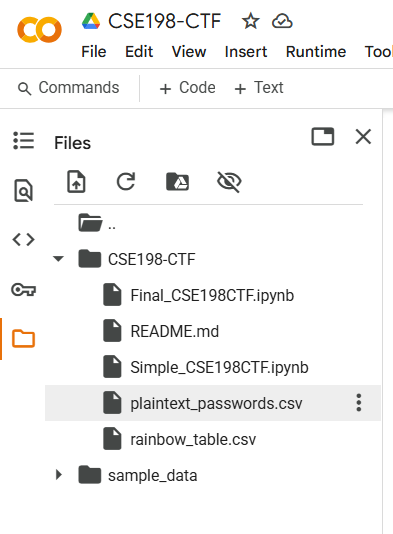

In [ ]:
FLAG1 = ""
submit_solution(1, FLAG1)

Failed to submit solution: {'message': 'Problem already solved.'}


## Flag 2: Basic Password Hashing & Dictionary Attack

Flag 1 should have demonstrated why hashing passwords is so important to ensure security. With hashed passwords, instead of seeing a table full of everyone's password, you now see a bunch of long strings which were encrypted with an irreversable hashing algorithm (in this case SHA256). So instead of seeing the plaintext of user 36's password in our table, we now see this:



```
User ID: 16 || SHA256 Hash: 1c8bfe8f801d79745c4631d09fff36c82aa37fc4cce4fc946683d7b336b63032
```

Not so easy to get the credentials now. For this next challenge, we're going to mimic a dictionary attack to crack a user's password. Use the website https://emn178.github.io/online-tools/sha256.html to try encrypting all the passwords from the same plaintext_passwords.csv file until you find which one matches the hash below.


```
6382deaf1f5dc6e792b76db4a4a7bf2ba468884e000b25e7928e621e27fb23cb
```

Once you figure out the plaintext password, paste it into the FLAG2 variable below like you did in flag 1.


In [ ]:
FLAG2 = "plaintext password"
submit_solution(2, FLAG2)

## Flag 3: Rainbow Table Attack
As we saw in the previous flag, the dictionary attack is a quick and easy way to crack commonly used or leaked passwords. However, in the real world simple dictionary attacks can still be very slow. Many encryption algorithms specifically designed for password hashing like Bcrypt, Argon2, or scrypt are designed to be much slower to improve resistance against password cracking. Additionally, when our dictionary grows from a few hundred passwords to millions, you can see how dictionary attacks can become quite slow.

To speed this process up, hackers often use rainbow table attacks. Rainbow table attacks are similar to dictionary attacks, but instead of taking a list of plaintext passwords and hashing them all manually we will take a precomputed list of password hashes and their corresponding plaintext passwords and search it for the password we are trying to crack. In this excersise, search the rainbow_table.csv file (mapping the top 500 most common passwords to their SHA256 hashes) to quickly find the password associated with the below hash.
```
8fced00b6ce281456d69daef5f2b33eaf1a4a29b5923ebe5f1f2c54f5886c7a3
```

*Side note: In the real world rainbow tables are generally a bit more complicated and powerful than we see in this flag. Rainbow tables use a technique called hash chaining to efficiently store a huge amount of hash value -> password pairings, allowing them to cover a much larger subspace of passwords than a simple csv like we do here. Hash chaining is so powerful it allows you to cover all possible passwords as long as the max length isn't too long, essentially precomputing a brute force attack!*

In [ ]:
FLAG3 = "plaintext password"
submit_solution(3, FLAG3)

## Flag 4-6: Brute Force Attacks
Dictionary attacks and rainbow tables are great ways to quickly crack passwords, but what if the hashed password you are trying to crack isn't in any of those lists? We fall back to the attack of last resort: the Brute Force Attack.

In this attack, we will simply try every possible combination of letters and numbers until we find a matching hash value. Theoretically, this attack will always succeed at cracking a password (since all possible combinations are attempted). In practice, strong passwords take so long to crack it's infeasible to actually decipher them using this strategy.

For flags 4-6, mimic a brute force cracking algorithm by trying all possible combinations of passwords using the same hashing site as before (https://emn178.github.io/online-tools/sha256.html). To make this task easier, assume all passwords consist only of the letters:


```
y, w, t, q, r, e
```


Flag 4 (1 point, password length 1 character):


```
8e35c2cd3bf6641bdb0e2050b76932cbb2e6034a0ddacc1d9bea82a6ba57f7cf
```



Flag 5 (3 points, password length 2 characters):

```
dc7c811b9561739d9b75bb3e9e1715970a868834e62251b0b9ca02e74d0f42c9
```


Flag 6 (4 points password length 3 characters):


```
2ec9b234f9794947d51f3528eb36c37d340f7da1d4ca00030649aabd3172bb5b
```


In [ ]:
FLAG4 = "plaintext password"
submit_solution(4, FLAG4)

In [ ]:
FLAG5 = "plaintext password"
submit_solution(5, FLAG5)

In [ ]:
FLAG6 = "plaintext password"
submit_solution(6, FLAG6)